![0.jfif](https://uupload.ir/files/cy6_air.png)

# Practice 8

<div dir="rtl">
سلام!

در این تمرین قراره با پایتورچ کار کنید!

## Part 1

<div dir="rtl">

ابتدا یه کم مقدمات پایتورچ رو مرور کنیم

<div dir="rtl">
سوال 1 : یک تنسور از اعداد 0 تا 29 بسازید (با استفاده از دستورات پایتورچ) و به صورت یک تنسور با تعداد سطر 6 و تعداد ستون 5 در بیارید

<div dir="rtl">
x یک تنسور از 1000 عدد با فاصله های مساوی بین -5 تا +5 می باشد

In [69]:
import torch
import matplotlib.pyplot as plt
from torch import nn
x1 = torch.linspace(0,29,30).view(6,5)
x = torch.linspace(-5,5,1000).view(-1,1)
x.shape


torch.Size([1000, 1])

<div dir="rtl">
یادتون باشه شکل x باید جوری باشه بشه وارد شبکه ش کرد.
به عبارت دیگه تنسور شما باید دارای دو بعد باشه که بعد اول تعداد نمونه های شماست

<div dir="rtl">

تابع y_func رو به صورتی بسازید که خروجی زیر رو تحویل بده

$y = 20sin(5x) + 6x^2 + tanh(x)$

In [70]:
y = 20*torch.sin(5*x) + 6*x**2 + torch.tanh(x)

<div dir="rtl">
نمودار y بر حسب x را در پایین نمایش بدید

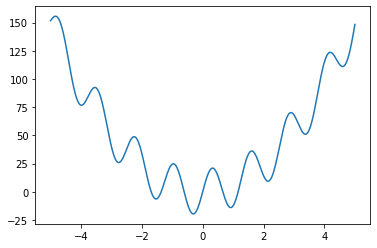

In [71]:
plt.plot(x,y)

<div dir="rtl">
با استفاده از پایتورچ، یک شکبه ی ساده طراحی کنید که بتونه تابع بالا رو به خوبی تخمین بزنه

<div dir="rtl">

شبکه تون داراي دو لايه ي دنس باشه با 20 تا نود، و اکتيويشن Relu

In [72]:
class MyNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.denseI = nn.Linear(in_features = 1, out_features = 20)
    self.relu = nn.ReLU()
    self.denseII = nn.Linear(in_features = 20, out_features = 1)


  def forward(self, input):
    y = self.denseI(input)
    y = self.relu(y)
    y = self.denseII(y)
    return y

In [73]:
mymodel = MyNN()

<div dir="rtl">
تابع هزينه و نوع اپتيمايزرتون رو مشخص کنيد، همچنين تعدا ايپاک ها رو برابر 15000 قرار بديد

In [74]:
epochs = 15000
criterion = nn.MSELoss()
opt = torch.optim.Adam(mymodel.parameters()) 

<div dir="rtl">
حلقه ي ترينتون رو بنويسيد و نتايج رو هر 1000 ايپاک نشون بديد


In [75]:
losses = []
for epoch in range(epochs):
  output = mymodel.forward(x)
  opt.zero_grad()
  loss = criterion(y, output)
  loss.backward()
  opt.step()
  losses.append(loss.item())
  if epoch % 1000 == 0:
    print(f'Loss = {loss.item() : 0.3f}')

Loss =  4800.939
Loss =  885.251
Loss =  537.610
Loss =  403.672
Loss =  320.748
Loss =  261.933
Loss =  229.261
Loss =  220.733
Loss =  208.213
Loss =  205.152
Loss =  203.244
Loss =  201.868
Loss =  200.639
Loss =  199.447
Loss =  193.690


<div dir="rtl">

خروجي رو پلات کنيد

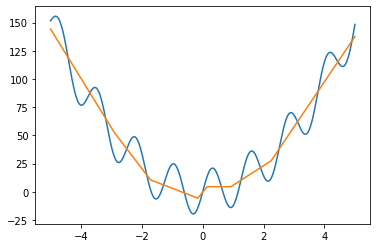

In [77]:
plt.plot(x, y, x, output.detach())

<div dir="rtl">

آيا نتايج قابل قبول است؟

<div dir="rtl">
توضیحات شما : 
خیر و همانطور که از شکل معلوم است دو نمودار منطبق نیستند

<div dir="rtl">
همون مدل بالا رو دوباره بسازيد.
اين بار به جاي اکتيوشن relu از سينوس استفاده کنيد.

توي تابع فوروارد مستقيما از تايع سينوس استفاده کنيد به جاي اکتيوشن

<div dir="rtl">
 در آخر نتايج رو با قبلي مقايسه کنيد

In [78]:
class MyNN2(nn.Module):
  def __init__(self):
    super().__init__()
    self.denseI = nn.Linear(in_features = 1, out_features = 20)
    self.denseII = nn.Linear(in_features = 20, out_features = 1)


  def forward(self, input):
    y = self.denseI(input)
    y = torch.sin(y)
    y = self.denseII(y)
    return y

In [79]:
mymodel = MyNN2()

In [80]:
epochs = 15000  
criterion = nn.MSELoss()
opt = torch.optim.Adam(mymodel.parameters()) 

In [81]:
losses = []
for epoch in range(epochs):
  output = mymodel.forward(x)
  opt.zero_grad()
  loss = criterion(y, output)
  loss.backward()
  opt.step()
  losses.append(loss.item())
  if epoch % 1000 == 0:
    print(f'Loss = {loss.item() : 0.6f}')

Loss =  4713.354980
Loss =  2713.694580
Loss =  1734.684326
Loss =  1209.347290
Loss =  908.416321
Loss =  717.850708
Loss =  580.050537
Loss =  476.196686
Loss =  399.951721
Loss =  345.874969
Loss =  308.409058
Loss =  282.560272
Loss =  263.127197
Loss =  241.305237
Loss =  229.186050


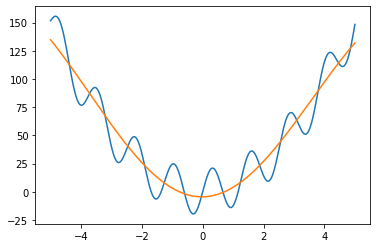

In [82]:
plt.plot(x,y, x, output.detach())

<div dir="rtl">
نتايج رو تحليل کنيد

<div dir="rtl">
توضیحات شما : 
نتیجه ی حاصل کاملا منطبق نشد ولی با شیب آن موافق است و برخلاف مدل قبل ، نمودار حاصل پیوسته است و شکستگی ندارد و در نتیجه تابع سینوس نسبت به اکتیویشن رلو برای این تابع مناسب تر است و نمودار آن به نمودار اصلی نزدیک تر است.


## Part 2

<div dir="rtl">

در این قسمت قراره دیتاست MNIST رو لود کنید و تصاویر رو نگاه کنید

<div dir="rtl">
توابع مورد نیاز رو لود کنید

In [83]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import MNIST
from torchvision import transforms

<div dir="rtl">
تبدیل هایی که میخواید روی تصاویر اعمال بشه رو انتخاب کنید.

اینجا فقط میخوایم که تصاویر به تنسور تبدیل بشن

In [84]:
transform = transforms.Compose([transforms.ToTensor()])

<div dir="rtl">

دیتاست ترین MNIST را لود کرده و تبدیل بالا را روی آن اعمال کنید

In [85]:
train_data = MNIST('./minst', download = True, train = True, transform=transform)

<div dir="rtl">


یک دیتا لودر برای دیتاستتون بسازید

<div dir="rtl">
بچ سایز رو هم برابر 64 قرار بدید

In [86]:
train_loader = DataLoader(train_data, batch_size = 64, num_workers = 3)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


<div dir="rtl">

با استفاده از تابع iter 
که تو خود پایتون هست، دیتالودروتون رو به یک iterable تبدیل کنید

In [87]:
data_iterable = iter(train_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


<div dir="rtl">

با استفاده از تابع next که 
و یا متد next ، بچ بعدی داده ها رو از دیتا لودر بگیرید

In [92]:
batch = next(data_iterable)
print(batch)
print(len(batch))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

<div dir="rtl">

این بچ دارای چه داده هایی است؟

<div dir="rtl">
توضیحات شما : 
داده های این بچ در داخل یک لیستی از اعدااد هستند که این لیست دارای دو عضو است که هر دو تنسور هستند:
اولی داده های پیکسل های عکس به صورت آرایه ای از اعداد درآمده و تنسور دومی لیبل  های عکس های متناظر از عضو اول هست.  

<div dir="rtl">

داده های تصویر و لیبل را از هم جدا کنید

In [93]:
images = batch[0]
labels = batch[1]

<div dir="rtl">

shape داده های تصویر را مورد بررسی قرار دهید و در مورد آن توضیح دهید

In [94]:
images.shape

torch.Size([64, 1, 28, 28])

<div dir="rtl">
توضیحات شما : 
نتیجه ی شیپ یک لیست است:
عضو اول تعداد داده ها است که همان بچ سایز است
عضو بعدی تعداد کانال های عکس است که چون سیاه و سفید است، یک است
عضو های بعدی ارتفاع و عرض عکس هستند.

<div dir="rtl">

آیا این نحوه ی نمایش معمول است؟

<div dir="rtl">
توضیحات شما : 
در کراس بعد از تعداد، ابتدا ابعاد عکس و سپس تعداد کانال ها بود و در اینجا برعکس است.


<div dir="rtl">
با توجه به shape فعلی داده ها
از دستور permute در پایتورچ استفاده کنید و نحوه ی نمایش را به صورت معمول یعنی
(H,W,C) تبدیل کنید.

نحوه ی کار با این دستور را سرچ نمایید

In [95]:
new_images_tensor = images.permute(0,2,3,1)

In [96]:
new_images_tensor.shape

torch.Size([64, 28, 28, 1])

<div dir="rtl">

تنسور new_images را به یک آرایه ی نامپای تبدیل کنید و سپس با استفاده از دستور subplots در مت پلات لیب 9 تصویر اول رو نمایش بدید

<div dir="rtl"> با تئجه به تعدا  ابعاد تصویر به یک ارور بر میخورید که مال متپلات لیب هستش و میگه که شکل (28,28,1) شکل درستی نیست برای تصویر، این ایراد رو برطرف کنید و سپس کارتون رو انجام بدید

پ.ن : در صورتی که کار با subplots رو بلد نیستید :
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

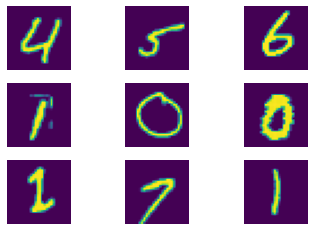

In [97]:
new_images_array = np.array(new_images_tensor)
fig, ax = plt.subplots(3,3)
k = 0
for i in range(3):
  for j in range(3):
    ax[i,j].imshow(new_images_array[k].reshape(28,28))
    ax[i,j].axis('off')
    k +=1